C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


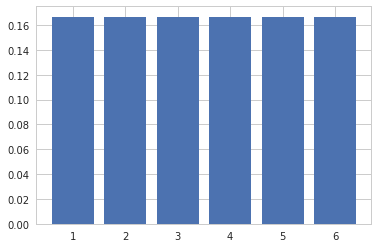

In [6]:
# 카테고리 분포의 이론값
%matplotlib inline

theta = np.array([1/6] * 6)
rv = sp.stats.multinomial(1, theta)

xx = np.arange(1, 7)
xx_ohe = pd.get_dummies(xx) # one-hot-encoding 적용

plt.bar(xx, rv.pmf(xx_ohe))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


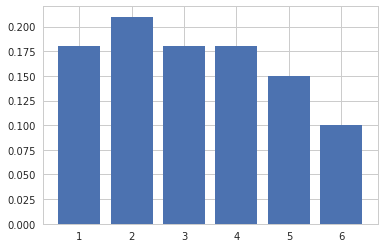

In [11]:
# 카테고리 분포의 Simulation

np.random.seed(1)
X = rv.rvs(100) # sample 100개 사용
y = X.sum(axis=0) / float(len(X))
plt.bar(np.arange(1,7), y)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


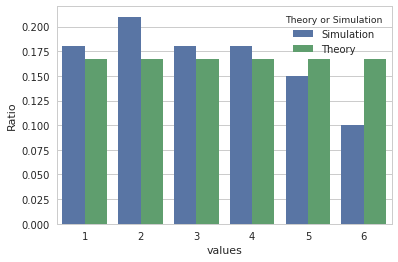

In [13]:
# 카테고리 분포의 Theory and Simulation
df = pd.DataFrame({'Theory':rv.pmf(xx_ohe), 'Simulation': y}, index=np.arange(1,7)).stack()
df = df.reset_index()
df.columns = ['values', 'Theory or Simulation', 'Ratio']

sns.barplot(x='values', y='Ratio', hue='Theory or Simulation', data=df)
plt.show()

#### Theta 를 다른 값으로 실행 (theta = not 균등분포)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


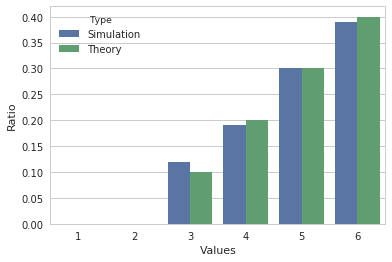

In [16]:
eps = np.finfo(np.float).eps
theta = np.array([eps, eps, 0.1, 0.2, 0.3, 0.4])
rv = sp.stats.multinomial(1, theta)

X = rv.rvs(100, random_state=1)
y = X.sum(axis=0) / float(len(X))

df = pd.DataFrame({'Theory': rv.pmf(xx_ohe), 'Simulation':y}, index=np.arange(1,7)).stack()
df = df.reset_index()
df.columns = ['Values', 'Type', 'Ratio']
sns.barplot(x='Values', y='Ratio', hue='Type', data=df)
plt.show()

